In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [8]:
# Grab the directory of the current file
# Should be ./Project/src/Program
try:
    current_dir = Path(__file__).parent.absolute()
except NameError:
    # If using a Jupyter notebook
    try:
        current_dir = Path.cwd()
    except:
        # If continuing to fail set path manually
        current_dir = Path("D:/School/CS 434/Project/src/Program")

# Go to the Data directory 
# Should be ./Project/src/Data
data_dir = current_dir.parent / "Data"

# Get the Dataset paths
imputed_path = data_dir / "loan_data_imputed.csv"
removed_path = data_dir / "loan_data_removed.csv"

# Verify the file exists
if imputed_path.exists() and removed_path.exists():
    print(f"Imputed dataset found at: {imputed_path}")
    df_imputed = pd.read_csv(imputed_path)
    print(f"Removed dataset found at: {removed_path}")
    df_removed = pd.read_csv(removed_path)
else:
    print(f"One or both datasets not found at expected path: {data_dir}")

# Show basic info
print("Imputed dataset shape:", df_imputed.shape)
print("Removed dataset shape:", df_removed.shape)

Imputed dataset found at: d:\School\CS 434\Project\src\Data\loan_data_imputed.csv
Removed dataset found at: d:\School\CS 434\Project\src\Data\loan_data_removed.csv
Imputed dataset shape: (367, 14)
Removed dataset shape: (289, 14)


In [9]:
def perform_eda(df, title):
    print(f"\n--- EDA for {title} Dataset ---")

    # Create a copy to avoid modifying the original dataframe
    df_analysis = df.copy()

    # Check for non-numeric columns that might cause issues
    print("\nData Types:")
    print(df_analysis.dtypes)

    # Basic stats (only for numeric columns)
    print("\nBasic Statistics:")
    print(df_analysis.describe())

    # Check class distribution
    print("\nClass Distribution (Loan_Status):")
    class_dist = df_analysis['Loan_Status'].value_counts(normalize=True) * 100
    print(class_dist)

    # Visualize class distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Loan_Status', data=df_analysis)
    plt.title(f'Loan Status Distribution - {title}')
    plt.ylabel('Count')
    plt.show()

    # Identify numeric columns for correlation analysis
    numeric_cols = df_analysis.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Correlation matrix (only for numeric columns)
    if len(numeric_cols) > 1:  # Only if we have at least 2 numeric columns
        plt.figure(figsize=(12, 10))
        corr = df_analysis[numeric_cols].corr()
        mask = np.triu(np.ones_like(corr, dtype=bool))
        sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", square=True)
        plt.title(f'Correlation Matrix - {title}')
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough numeric columns for correlation analysis")

    # Feature distributions by target
    # Identify actual numerical columns that exist in the dataframe
    suggested_numerical_columns = ['ApplicationIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
    numerical_columns = [col for col in suggested_numerical_columns if col in df_analysis.columns]

    if numerical_columns:
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(numerical_columns):
            plt.subplot(2, 2, i + 1)
            sns.boxplot(x='Loan_Status', y=col, data=df_analysis)
            plt.title(f'{col} by Loan Status')
        plt.tight_layout()
        plt.show()

        # Check for outliers in numerical features
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(numerical_columns):
            plt.subplot(2, 2, i + 1)
            sns.histplot(df_analysis[col], kde=True)
            plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()
    else:
        print("No suitable numerical columns found for boxplots and histograms")

    return class_dist


--- EDA for Imputed Dataset ---

Data Types:
Loan_ID                     object
Gender                       int64
Married                      int64
Dependents                   int64
Education                   object
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History               int64
Loan_Status                  int64
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object

Basic Statistics:
           Gender     Married  Dependents  Self_Employed  ApplicantIncome  \
count  367.000000  367.000000  367.000000     367.000000       367.000000   
mean     0.809264    0.634877    0.806540       0.100817      4805.599455   
std      0.393417    0.482122    1.065177       0.301498      4910.685399   
min      0.000000    0.000000    0.000000       0.000000         0.000000   
25%      1.000000    0.000000    0.000000     

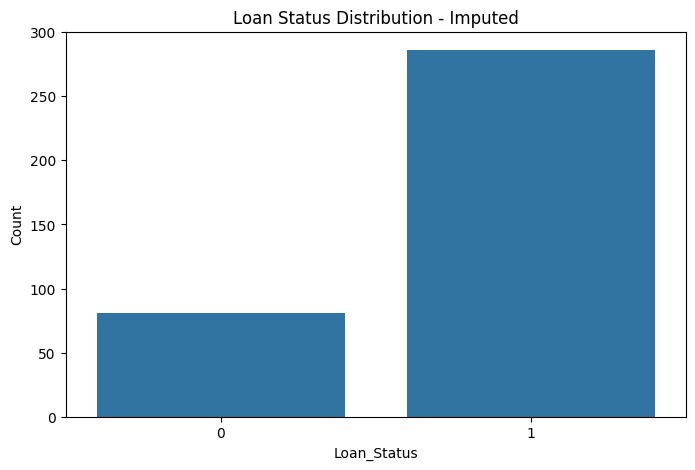

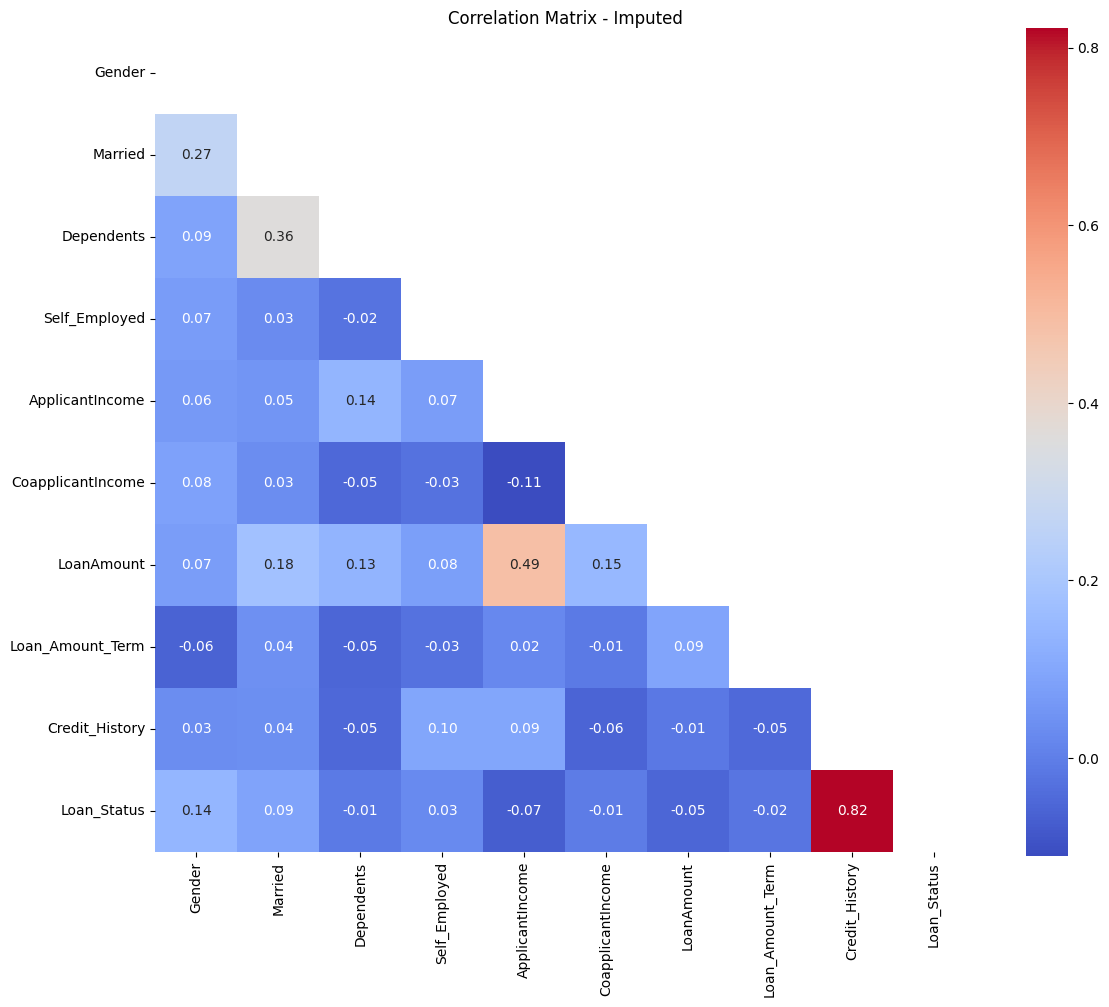

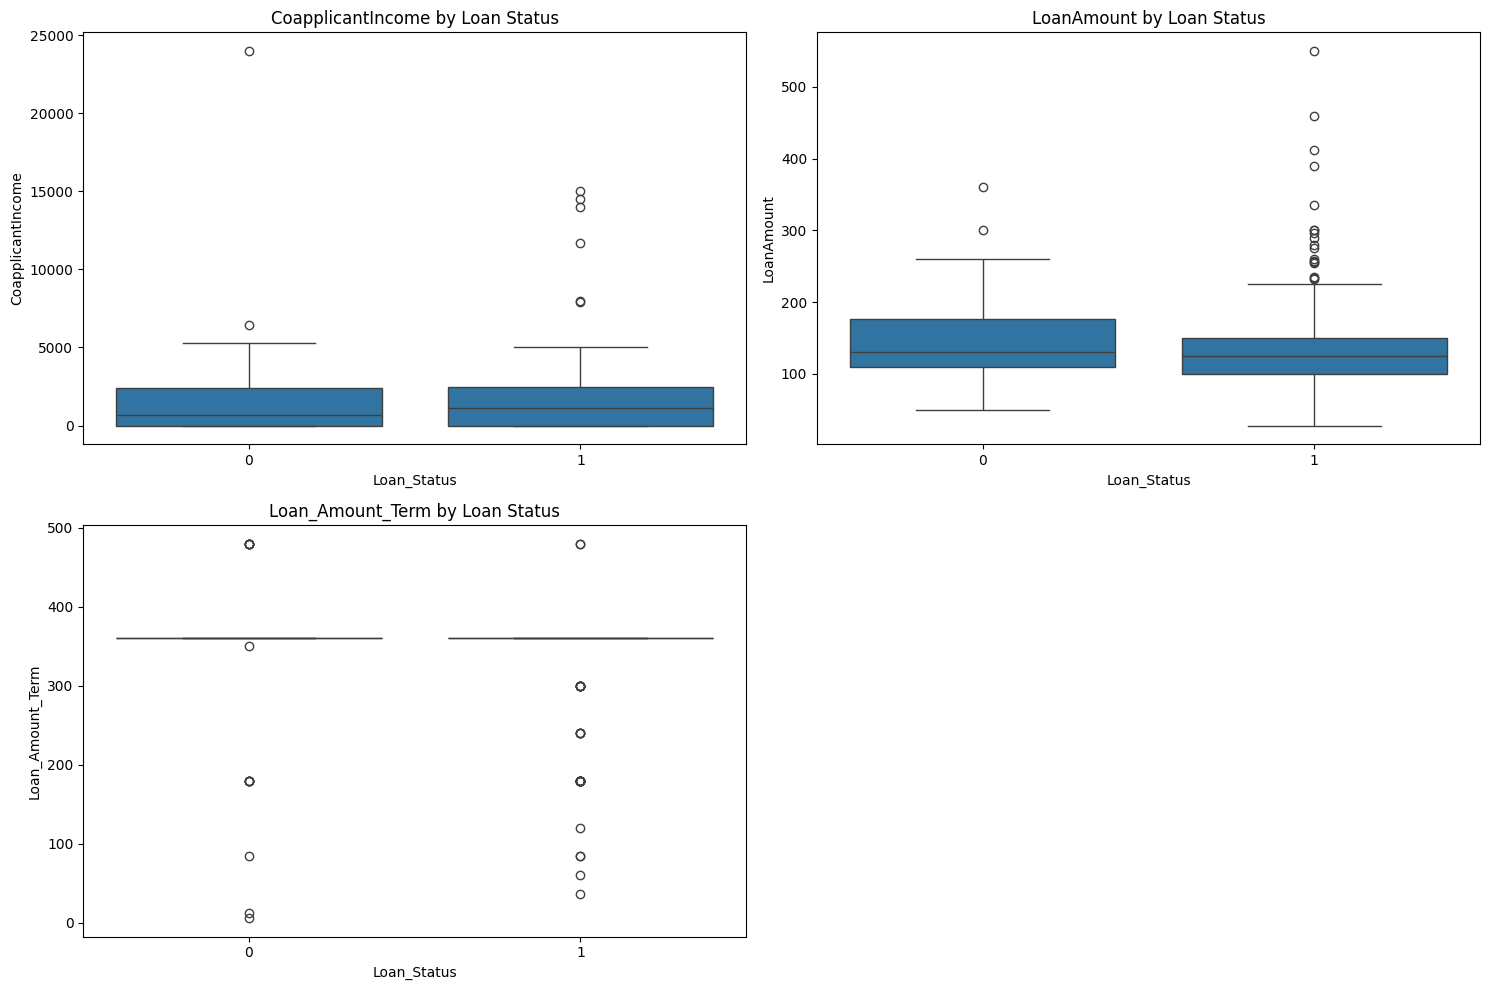

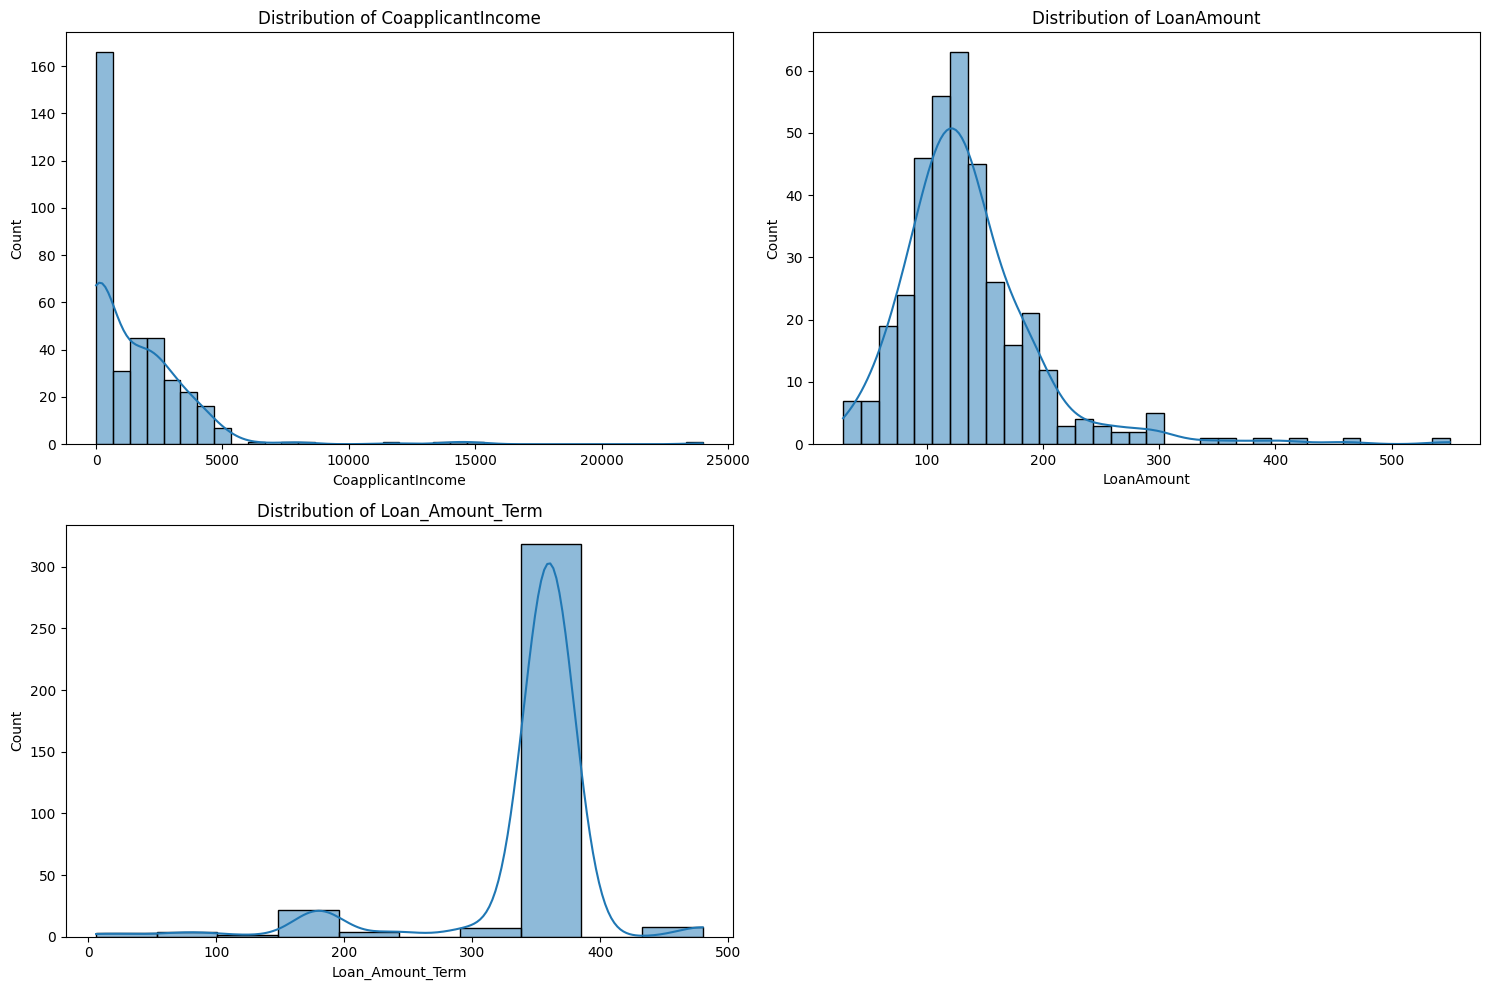


--- EDA for Removed Dataset ---

Data Types:
Loan_ID                     object
Gender                       int64
Married                      int64
Dependents                   int64
Education                   object
Self_Employed                int64
ApplicantIncome              int64
CoapplicantIncome            int64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History               int64
Loan_Status                  int64
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object

Basic Statistics:
           Gender     Married  Dependents  Self_Employed  ApplicantIncome  \
count  289.000000  289.000000  289.000000     289.000000       289.000000   
mean     0.795848    0.647059    0.802768       0.110727      4637.352941   
std      0.403780    0.478714    1.063533       0.314338      4790.683934   
min      0.000000    0.000000    0.000000       0.000000         0.000000   
25%      1.000000    0.000000    0.000000     

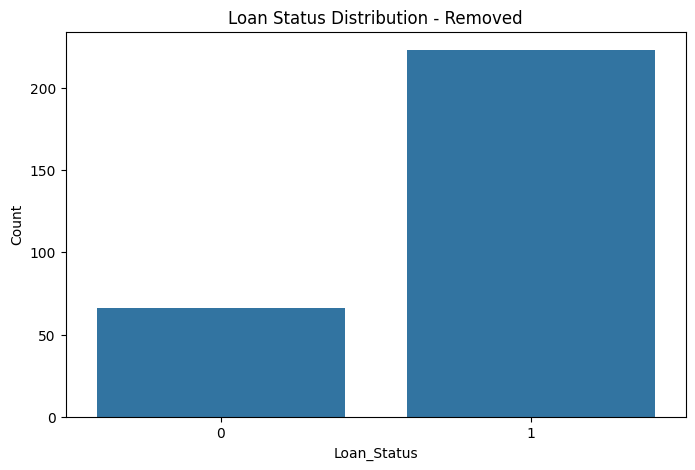

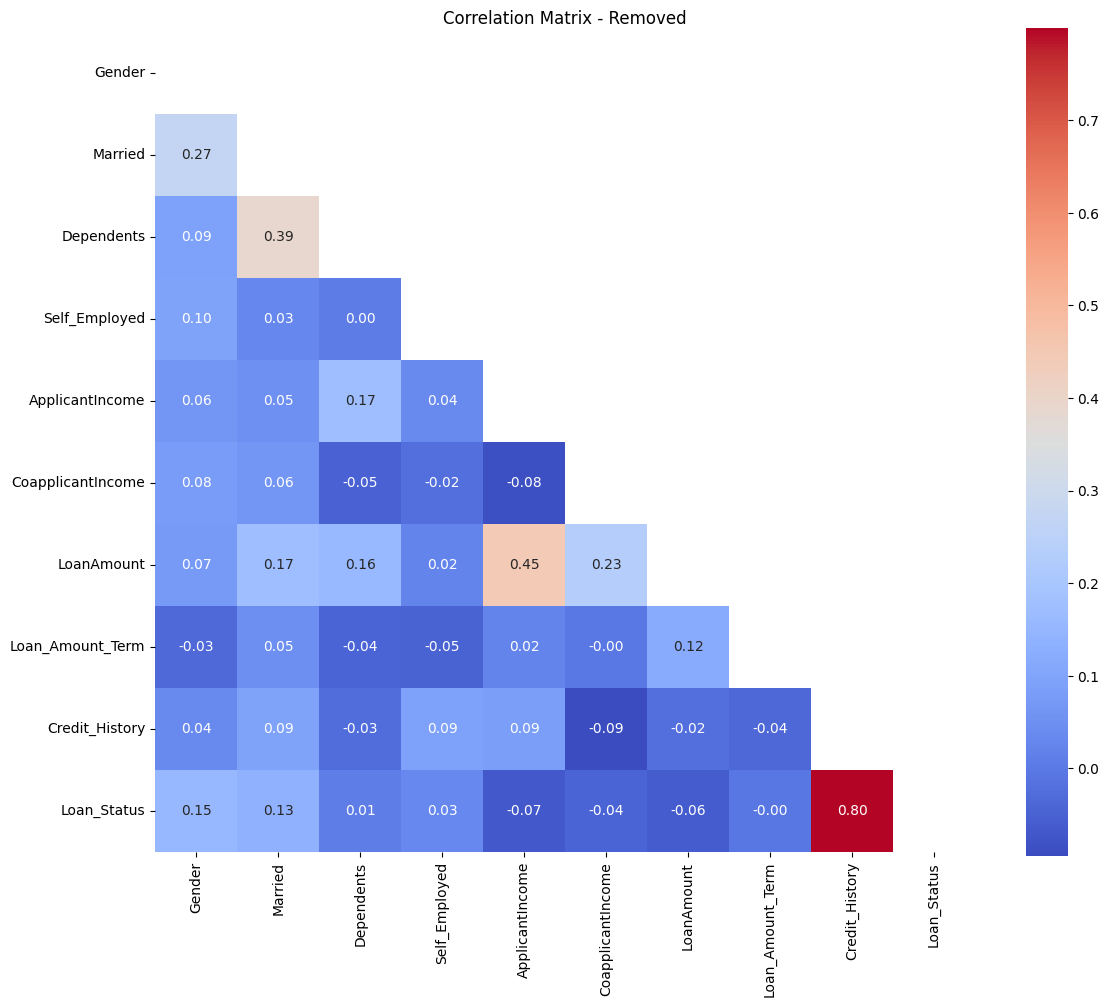

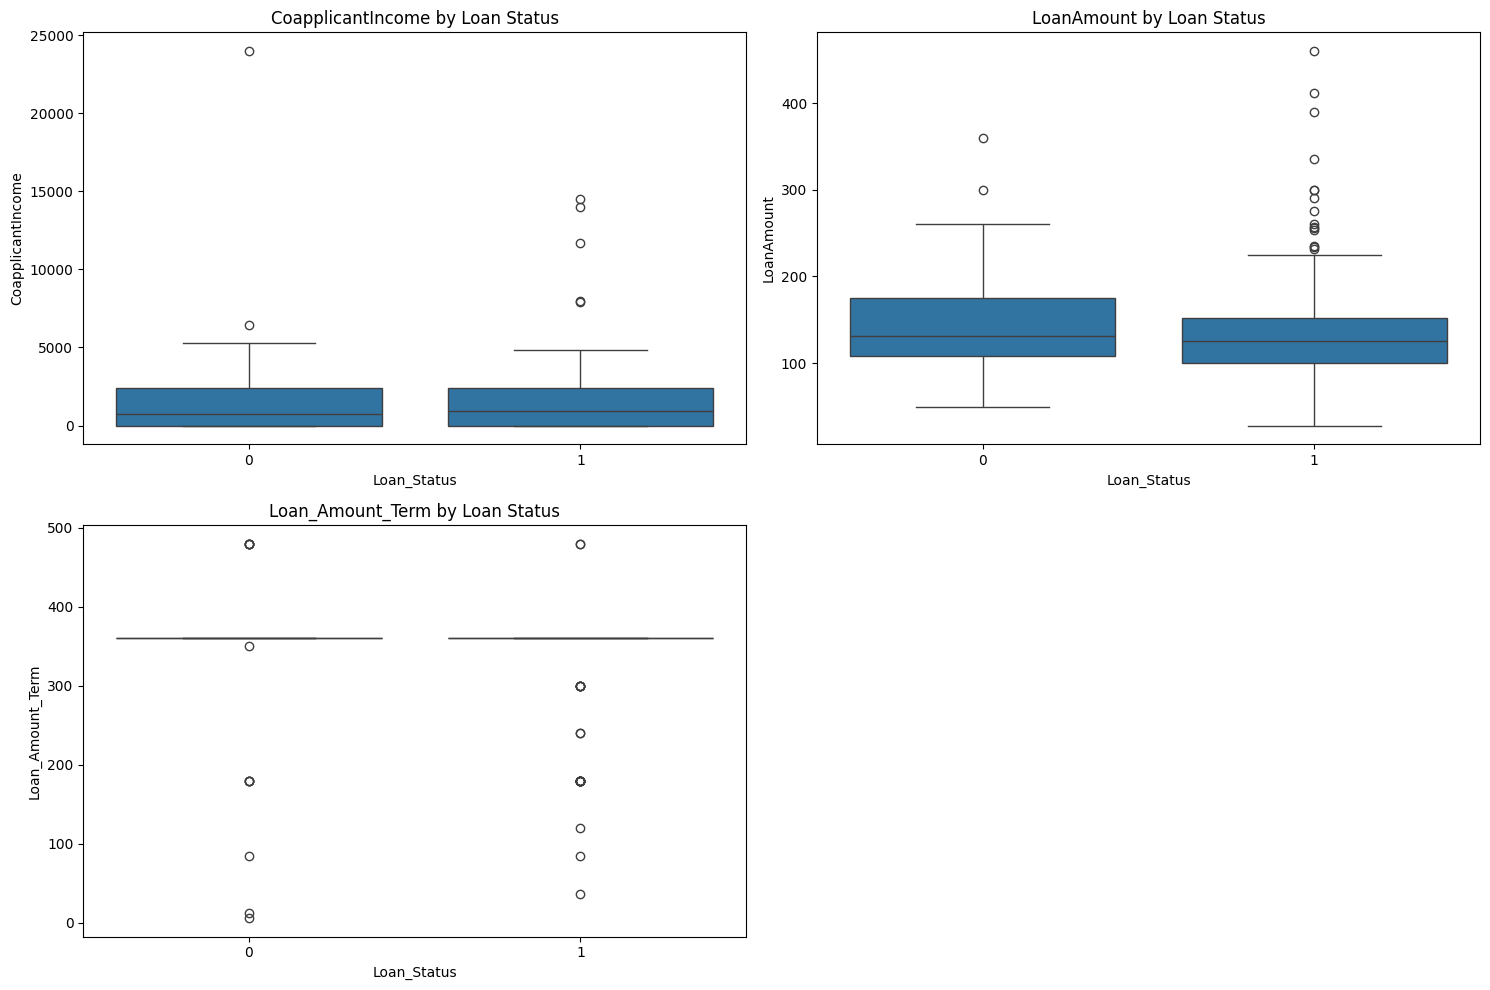

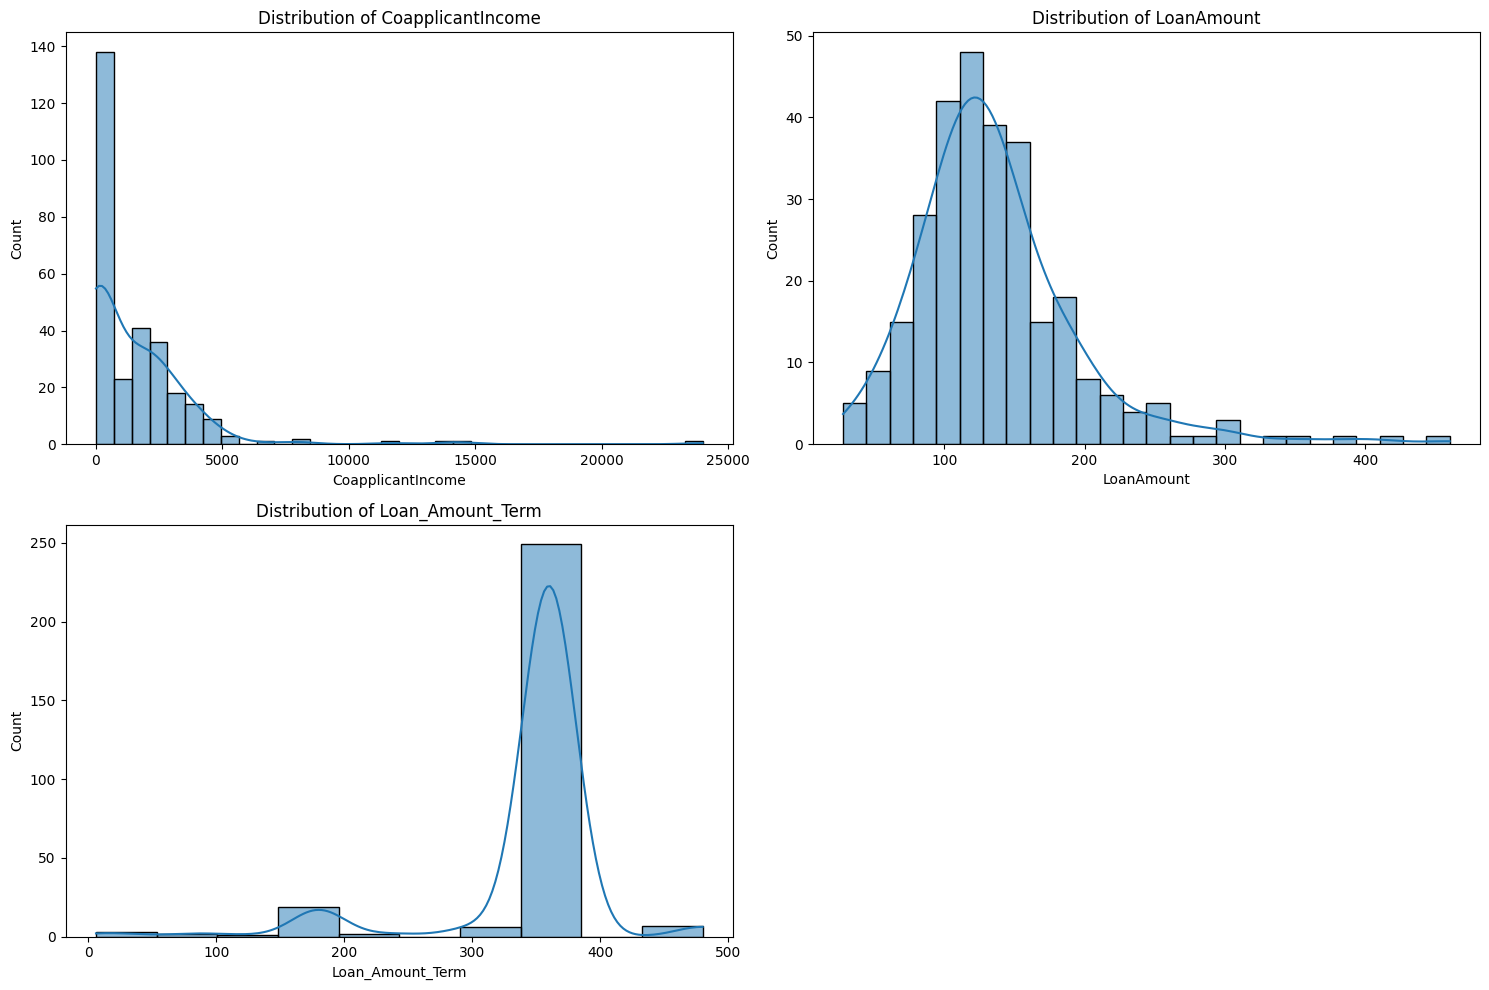

In [10]:
# Perform EDA on both datasets
class_dist_imputed = perform_eda(df_imputed, "Imputed")
class_dist_removed = perform_eda(df_removed, "Removed")